# Лабораторна робота №2

## Частина 1: Регресія на згенерованому наборі даних

### 1.1 Згенеруйте набір даних 
Згенеруйте набір даних для регресії за допомогою sklearn.datasets.make_regression (використати не менше 5 параметрів). Набір даних повинен містити не менше 1000 екземплярів.

In [51]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

# Генеруємо набір даних для регресії
X, y = make_regression(n_samples=1000,    # Кількість екземплярів
                       n_features=5,      # Кількість параметрів
                       n_informative=3,   # Визначає кількість інформативних параметрів в наборі даних
                       noise=17,         # Рівень шуму
                       random_state=42)

df = pd.DataFrame(data=X, columns=[f'Feature_{i+1}' for i in range(5)])
df['Target'] = y

# Зберігаємо набір даних у CSV-файл
df.to_csv('data_for_part1.csv', index=False)

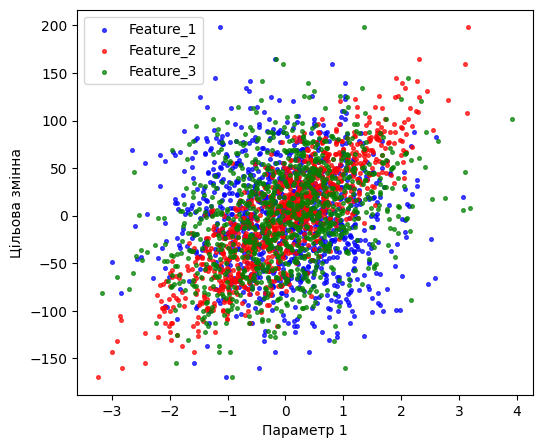

In [52]:
import matplotlib.pyplot as plt

# Створюємо графік, щоб візуалізувати згенеровані дані
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.scatter(X[:, 0], y, s=7, color='b', label='Feature_1', alpha=0.7)
plt.scatter(X[:, 1], y, s=7, color='r', label='Feature_2', alpha=0.7)
plt.scatter(X[:, 2], y, s=7, color='g', label='Feature_3', alpha=0.7)
plt.xlabel('Параметр 1')
plt.ylabel('Цільова змінна')
plt.legend()
plt.show()

# 1.2 Розподіл даних
Розділіть дані на навчальний та тестовий набори у співвідношенні 80% - 20%.

In [53]:
# Завантаження даних
data = pd.read_csv('data_for_part1.csv')

# Перегляд перших декількох рядків даних
print("---Перегляд перших декількох рядків даних---")
print(data.head(), "\n")

# Вивести інформацію про дані, такі як кількість рядків, стовпців і типи даних
print("---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---")
print(data.info(), "\n")

# Вивести основні статистичні показники даних
print("---Основні статистичні показники даних---")
print(data.describe(), "\n")

---Перегляд перших декількох рядків даних---
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5     Target
0  -0.735201   1.798725  -1.095519   1.656208  -0.880754  77.812223
1  -1.613561  -1.371901  -0.172946   1.471170   1.711708 -23.236355
2   0.651391   0.954002   0.570891  -0.315269   1.135566  60.810932
3  -1.350556  -0.687014  -0.475795  -0.075871  -0.826112 -53.744184
4   1.554160   0.342338  -0.530971   0.853976  -0.335138  -0.138741 

---Вивід інформації про дані: к-сті рядків, стовпців, типу даних---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   Target     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB
None 

---О

In [54]:
# Розділення даних на тренувальний і тестовий набори
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1.3 Побудуйте модель регресії 
Побудуйте модель регресії на навчальних даних та оцініть її точність на тестових даних. Використовуйте будь-який регресійний алгоритм за вибором (наприклад, лінійна регресія, дерево рішень, Random Forest тощо).

Mean Squared Error: 278.19893450733974
R-squared: 0.906798838953286


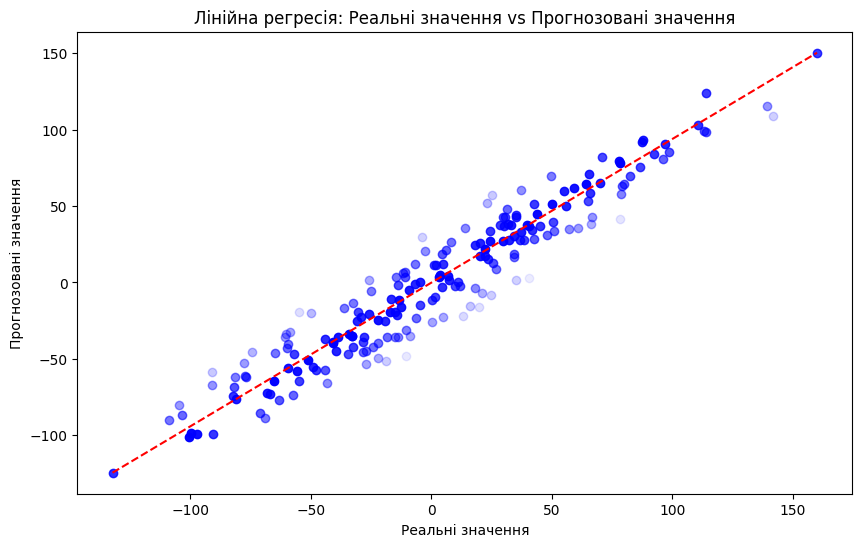

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Побудова моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка точності моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Виведення результатів
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Відстань між справжніми та прогнозованими значеннями
distances = np.abs(y_test - y_pred)
# Максимальна відстань для налаштування прозорості
max_distance = np.max(distances)


# Візуалізація результатів з налаштуваною прозорістю
plt.figure(figsize=(10, 6))
for i in range(len(y_test)):
    alpha = 1 - (distances[i] / max_distance)  # Прозорість залежно від відстані
    plt.scatter(y_test[i], y_pred[i], c='b', alpha=alpha)

plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red')
plt.xlabel("Реальні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Лінійна регресія: Реальні значення vs Прогнозовані значення")
plt.show()

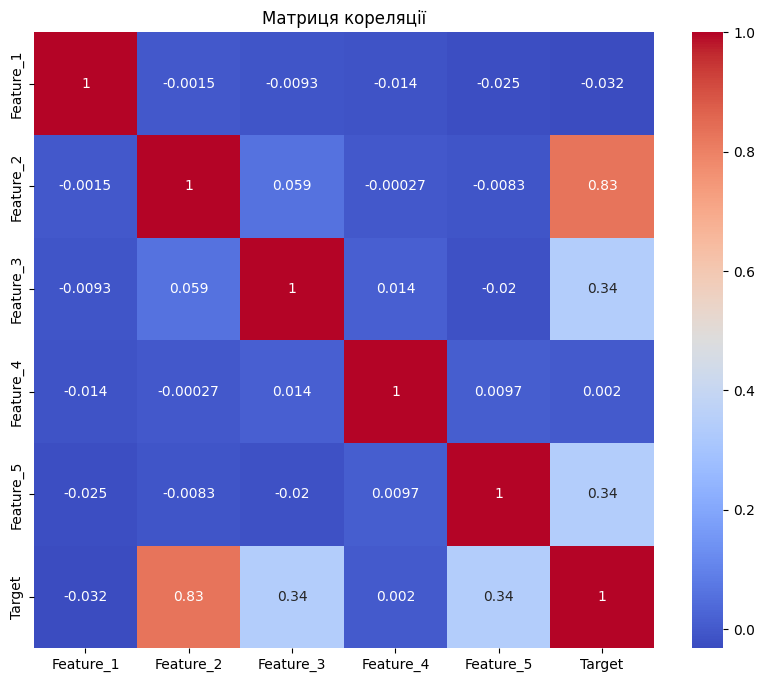

In [56]:
import seaborn as sns

# Матриця кореляції
correlation_matrix = data.corr()

# Візуалізація матриці кореляції за допомогою теплової карти
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

### 1.4 Висновки
По результатам MSE та R-squared бачимо, що модель має непогану чіткість. При зменшенні шуму - точність збільшується.

## Частина 2: Аналіз часових даних

### 2.1 Набір часових даних
Знайдіть набір часових даних в Інтернеті. Це може бути, наприклад, набір даних про ціни на акції, погоду, рух транспорту, або будь-які інші дані, які залежать від часу.

In [57]:
# Приклад генерації такого набору даних (так, дле себе)

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Задаємо початкову дату і кількість днів
# start_date = '1981-01-01'
# # start_date = '2022-01-01'
# num_days = 365

# # Щоб кожен раз мати одні й ті самі дані
# np.random.seed(0)

# # Генеруємо часовий індекс
# date_index = pd.date_range(start=start_date, periods=num_days, freq='D')

# # Генеруємо тренд, сезонність та шум для руху транспорту
# trend = np.linspace(0, 10, num_days)
# seasonality = 5 * np.sin(2 * np.pi * np.arange(num_days) / 30)  # сезонність щомісяця
# noise = np.random.normal(0, 2, num_days)

# # Збираємо дані
# transport_data = trend + seasonality + noise

# # Створюємо DataFrame
# temp_df = pd.DataFrame({'TemperatureData': transport_data}, index=date_index)

# # Зберігаємо згенеровані дані у CSV-файл
# temp_df.to_csv('transport_data_for_part2.csv')

Завантаження даних з файлу

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завантаження даних
temp_df = pd.read_csv('min_daily_temperature_for_part2.csv', parse_dates=['Date'], index_col='Date')

temp_df.head()

,TemperatureData
Date,
1989-01-01,14.3
1989-01-02,17.4
1989-01-03,18.5
1989-01-04,16.8
1989-01-05,11.5


### 2.2 Завантажте та візуалізуйте ці дані. 
Переконайтеся, що ви розумієте основні характеристики часового ряду, такі як тренд, сезонність, аномалії тощо.

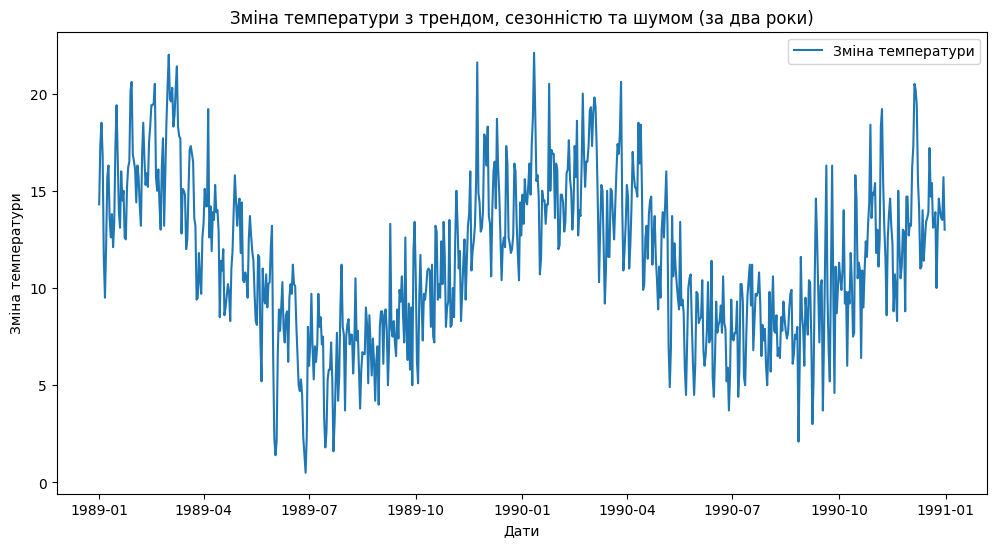

---Augmented Dickey-Fuller тест:---
ADF Statistic: -1.79
p-value: 0.38
Критичні значення:
1%: -3.44
5%: -2.87
10%: -2.57


In [59]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Візуалізація
plt.figure(figsize=(12, 6))
plt.plot(temp_df.index, temp_df['TemperatureData'], label='Зміна температури')
plt.title('Зміна температури з трендом, сезонністю та шумом (за два роки)')
plt.xlabel('Дати')
plt.ylabel('Зміна температури')
plt.legend()
plt.show()

# Перевірка стаціонарності часового ряду
result = adfuller(temp_df)
print("---Augmented Dickey-Fuller тест:---")
print(f'ADF Statistic: {result[0]:.2f}')  #  if ADF is less than: -3,5 -> значить дані є стаціонарними
# p-value допомагає визначити, чи можна відхилити нульову гіпотезу. Якщо p-value менше за 0.05),
# ... ми відхиляємо нульову гіпотезу. Це означає, що у нас є достатні докази в тому, що наші 
# ... спостереження не є випадковими
print(f'p-value: {result[1]:.2f}')
print('Критичні значення:')
for key, value in result[4].items():
    print(f'{key}: {value:.2f}')

# ADF Statistic > Критичне значення, немає достатніх доказів стаціонарності, і ми не відхиляємо нульову гіпотезу.
# ADF Statistic < Критичне значення, дані стаціонарні, підходять


### 2.3 Розкладання часового ряду даних
 Використовуйте методи аналізу часових рядів, такі як розкладання на компоненти, автокореляція тощо, для отримання інсайтів і підготовки даних для моделювання.

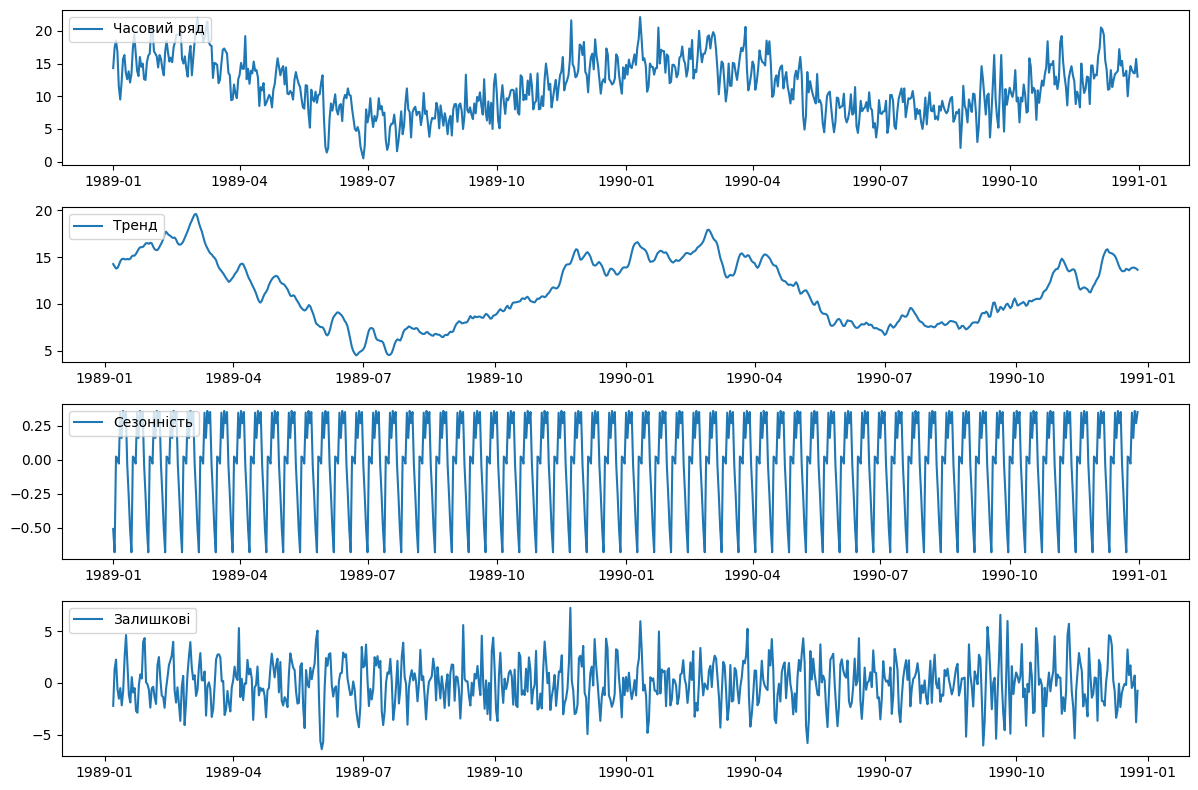

In [60]:
# Розділення часового ряду на тренд, сезонні та залишкові компоненти
decomposition = seasonal_decompose(temp_df, model='additive', period=12)
trend_component = decomposition.trend
seasonality_component = decomposition.seasonal
residuals = decomposition.resid

# Візуалізація компонентів
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(temp_df, label='Часовий ряд')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_component, label='Тренд')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality_component, label='Сезонність')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residuals, label='Залишкові')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [61]:
# Підібираємо найкращі параметри для ARIMA
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(temp_df['TemperatureData'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3237.062, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3398.578, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3382.531, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3354.892, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3396.578, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3236.574, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3246.068, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3246.632, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3236.998, Time=0.55 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3235.013, Time=0.22 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3236.995, Time=0.33 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3239.013, Time=0.45 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3233.025, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3244.078, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -1612.512
Date:                Wed, 11 Oct 2023   AIC                           3233.025
Time:                        18:30:46   BIC                           3251.391
Sample:                    01-01-1989   HQIC                          3240.111
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3646      0.034    -10.766      0.000      -0.431      -0.298
ma.L2         -0.3283      0.038     -8.541      0.000      -0.404      -0.253
ma.L3         -0.1342      0.037     -3.616      0.000      -0.207      -0.061
sigma2         4.8778      0.251     19.466      0.000       4.387       5.369
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.98   Prob(JB):                         0.65
Heteroskedasticity (H):               1.29   Skew:                             0.06
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

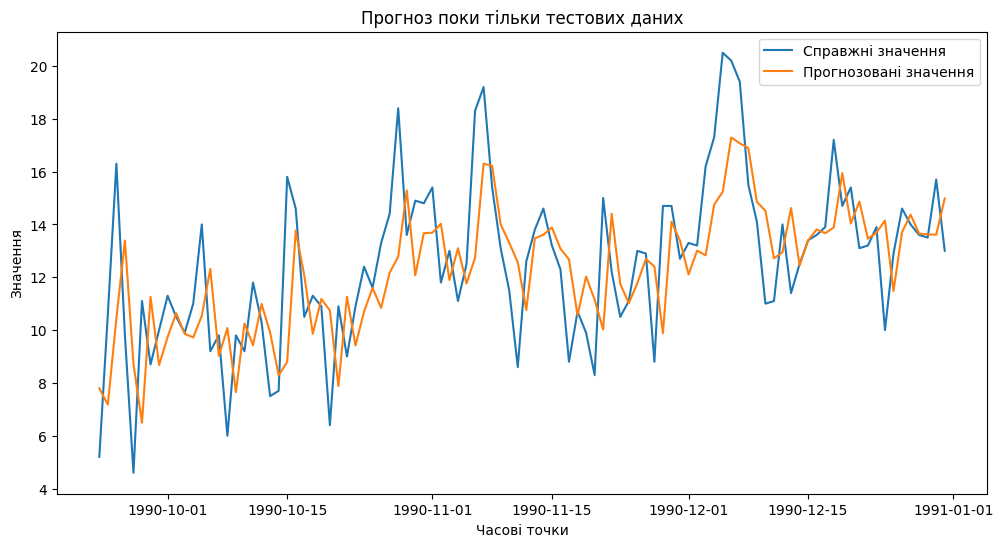

Середнє значення даних: 12.53
Середньоквадратична помилка (MSE) 2.52


In [62]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# print(temp_df.shape)
train=temp_df.iloc[:-100]
test=temp_df.iloc[-100:]
# print(train.shape, test.shape)

p, d, q = 0, 1, 3  # Параметри ARIMA
model = ARIMA(temp_df, order=(p, d, q))
model = model.fit()
# model.summary()

# Прогноз для тестових даних (для оцінки моделі)
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end, typ='levels')

# Візуалізація прогнозу та реальних значень
plt.figure(figsize=(12, 6))
plt.plot(temp_df['TemperatureData'].iloc[-100:], label='Справжні значення')
plt.plot(pred, label='Прогнозовані значення')
plt.title('Прогноз поки тільки тестових даних')
plt.xlabel('Часові точки')
plt.ylabel('Значення')
plt.legend()
plt.show()

# Оцінка точності моделі
mean = test['TemperatureData'].mean()
print(f"Середнє значення даних: {mean:.2f}")

rmse = sqrt(mean_squared_error(pred,test['TemperatureData']))
print(f"Середньоквадратична помилка (MSE) {rmse:.2f}")

In [63]:
model2=ARIMA(temp_df['TemperatureData'], order=(0,1,3))
model2=model2.fit()
temp_df.tail

<bound method NDFrame.tail of             TemperatureData
Date                       
1989-01-01             14.3
1989-01-02             17.4
1989-01-03             18.5
1989-01-04             16.8
1989-01-05             11.5
...                     ...
1990-12-27             14.0
1990-12-28             13.6
1990-12-29             13.5
1990-12-30             15.7
1990-12-31             13.0

[730 rows x 1 columns]>

In [64]:
# So indexes in date format
index_future_dates=pd.date_range(start='1990-12-31', end='1991-1-30')   

# Here prediction is made, for 30 days
pred=model2.predict(start=len(temp_df), end=len(temp_df)+30, typ='levels').rename('ARIMA Predictions')

# Indexing predictons
pred.index=index_future_dates
print(pred)

1990-12-31    13.053952
1991-01-01    13.425125
1991-01-02    13.691589
1991-01-03    13.691589
1991-01-04    13.691589
1991-01-05    13.691589
1991-01-06    13.691589
1991-01-07    13.691589
1991-01-08    13.691589
1991-01-09    13.691589
1991-01-10    13.691589
1991-01-11    13.691589
1991-01-12    13.691589
1991-01-13    13.691589
1991-01-14    13.691589
1991-01-15    13.691589
1991-01-16    13.691589
1991-01-17    13.691589
1991-01-18    13.691589
1991-01-19    13.691589
1991-01-20    13.691589
1991-01-21    13.691589
1991-01-22    13.691589
1991-01-23    13.691589
1991-01-24    13.691589
1991-01-25    13.691589
1991-01-26    13.691589
1991-01-27    13.691589
1991-01-28    13.691589
1991-01-29    13.691589
1991-01-30    13.691589
Freq: D, Name: ARIMA Predictions, dtype: float64


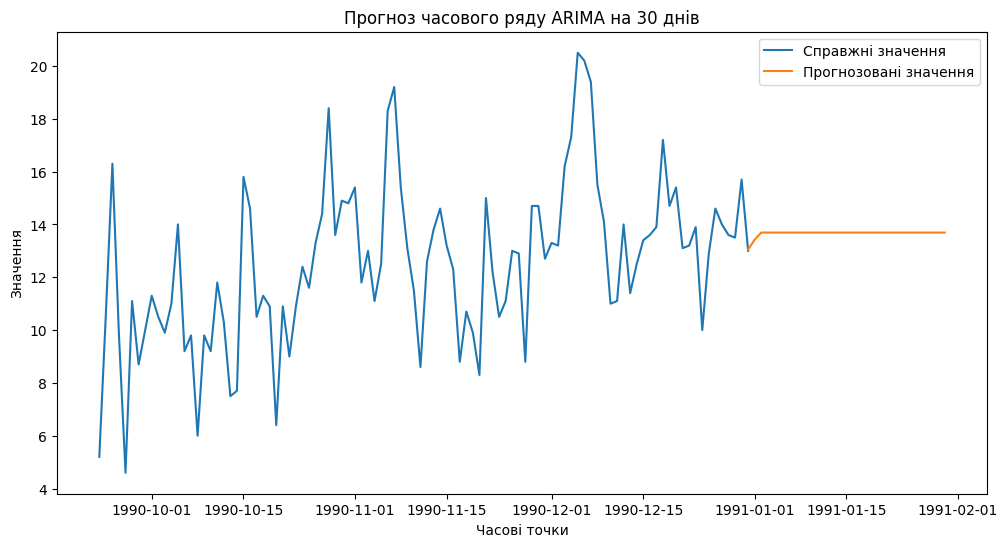

In [67]:
# Візуалізація прогнозованих даних
plt.figure(figsize=(12, 6))
plt.plot(temp_df['TemperatureData'].iloc[-100:], label='Справжні значення')
plt.plot(pred, label='Прогнозовані значення')

plt.title('Прогноз часового ряду ARIMA на 30 днів')
plt.xlabel('Часові точки')
plt.ylabel('Значення')

plt.legend()
plt.show()

### Висновки:

Як бачимо, передбачення на даних, що залежать від часу є хоч трохи чіткими тільки для декількох перших днів. Чим далі в майбутнє, тим більш неточними стають результати